- compare-recommendation-method-performance
    - x축
        - 곱셈 추천 방법?
    - y축
        - mape

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 테스트 데이터
df = pd.read_csv('/Users/bdlab/Desktop/sparse-matrix-multiplication/scenario-extraction/dataset/spmm-latency-dataset/extract-dataset-using-d-optimal/dataset/compare-recommendation-method-performance.csv')
df

,Unnamed: 0,Unnamed: 0.1,lr,lc,rc,ld,rd,lnnz,rnnz,lr*lc,...,only_sp_smdm,sp_smdm,bz_smsm,bz_right_sm_todense,bz_smdm,real_optim_latency,only_sparse,only_dense,static_threshold,proposed_system
0,0,0,122724,61616,2796,0.000319,0.3000,2415325,51698106,7561761984,...,37265,39339,65907,659,50682,39339,65907,39339,39339,42050
1,1,1,77031,584,19909,0.004916,0.3000,221416,3492264,44986104,...,17807,17904,67919,40,34985,17904,67919,17904,17904,20816
2,2,2,13984,6161,15339,0.008605,0.3000,741545,28355267,86155424,...,24123,25172,36579,246,59510,25172,36579,25172,25172,14854
3,3,3,114156,7995,9008,0.000134,0.3000,121974,21609624,912677220,...,16041,16820,26740,166,21667,16820,26740,16820,16820,18178
4,4,4,37623,1710,39221,0.001082,0.3000,69604,20122893,64335330,...,17875,18234,53721,151,30502,18234,53721,18234,18234,20137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,253,253,132622,40003,6124,0.001605,0.0010,8517214,245012,5305277866,...,175835,178283,3280,2514,375050,3280,3280,178283,3280,4680
254,254,254,81521,33249,22127,0.010843,0.0005,29389118,367856,2710491729,...,1140998,1148996,26869,7319,3486157,26869,26869,1148996,26869,32352
255,255,255,135291,86397,9008,0.001639,0.0005,19163682,389151,11688736527,...,611157,617631,5372,6165,1273477,5372,5372,617631,5372,6989
256,256,256,13828,42270,43148,0.010843,0.0005,6337939,911958,584509560,...,357296,366090,9830,8676,1418460,9830,9830,366090,9830,6488


### method 별 MAPE 계산

In [16]:
# MAPE
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [17]:
print("실제 최적값과 only_sparse 간의 MAPE : " , mean_absolute_percentage_error(df['real_optim_latency'].to_numpy(),df['only_sparse'].to_numpy()))
print("실제 최적값과 only_dense 간의 MAPE : " , mean_absolute_percentage_error(df['real_optim_latency'].to_numpy(),df['only_dense'].to_numpy()))
print("실제 최적값과 static_threshold 간의 MAPE : " , mean_absolute_percentage_error(df['real_optim_latency'].to_numpy(),df['static_threshold'].to_numpy()))
print("실제 최적값과 proposed_system 간의 MAPE : " , mean_absolute_percentage_error(df['real_optim_latency'].to_numpy(),df['proposed_system'].to_numpy()))

실제 최적값과 only_sparse 간의 MAPE :  51.44895725140471
실제 최적값과 only_dense 간의 MAPE :  269.21419944060284
실제 최적값과 static_threshold 간의 MAPE :  20.693257284045867
실제 최적값과 proposed_system 간의 MAPE :  13.031701773670637


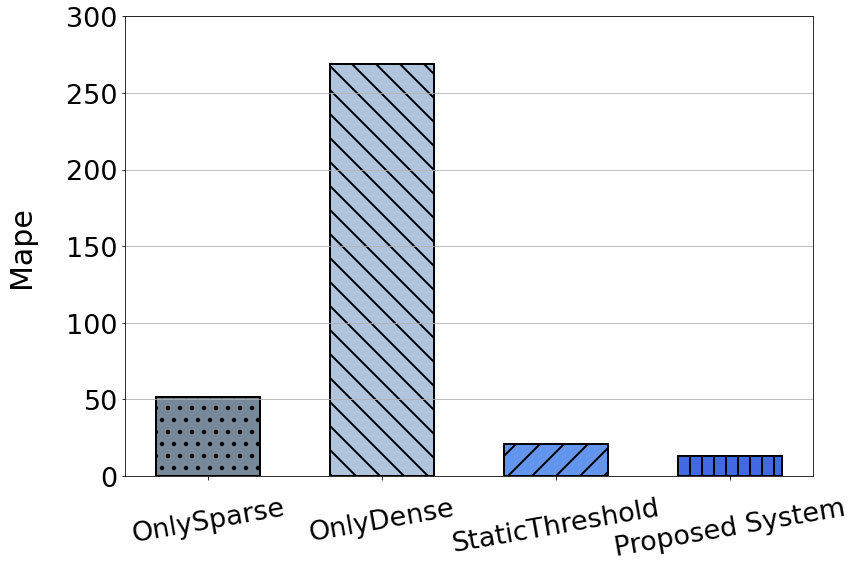

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# only sparse MAPE
only_sparse_mape = [51.44]
only_sparse_mape_min = [51.44]
only_sparse_mape_max = [51.44]
df = pd.DataFrame({'x_label':"only_sparse_mape",'only_sparse_mape':only_sparse_mape, 'only_sparse_mape_min': only_sparse_mape_min, 'only_sparse_mape_max': only_sparse_mape_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.only_sparse_mape - df.only_sparse_mape_min
df['maxgap'] = df.only_sparse_mape_max - df.only_sparse_mape
only_sparse_mape_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# only dense MAPE
only_dense_mape = [269.21]
only_dense_mape_min = [269.21]
only_dense_mape_max = [269.21]
df = pd.DataFrame({'x_label':"only_dense_mape",'only_dense_mape':only_dense_mape, 'only_dense_mape_min': only_dense_mape_min, 'only_dense_mape_max': only_dense_mape_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.only_dense_mape - df.only_dense_mape_min
df['maxgap'] = df.only_dense_mape_min - df.only_dense_mape
only_dense_mape_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# static threshold MAPE
static_mape = [20.69]
static_mape_min = [20.69]
static_mape_max = [20.69]
df = pd.DataFrame({'x_label':"static_mape",'static_mape':static_mape, 'static_mape_min': static_mape_min, 'static_mape_max': static_mape_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.static_mape - df.static_mape_min
df['maxgap'] = df.static_mape_max - df.static_mape
static_mape_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # XGBoost accuracy 성능
# XGBoost_accuracy = [0.90]
# XGBoost_accuracy_min = [0.90]
# XGBoost_accuracy_max = [0.90]
# df = pd.DataFrame({'x_label':"XGBoost",'XGBoost_accuracy':XGBoost_accuracy, 'XGBoost_accuracy_min': XGBoost_accuracy_min, 'XGBoost_accuracy_max': XGBoost_accuracy_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.XGBoost_accuracy - df.XGBoost_accuracy_min
# df['maxgap'] = df.XGBoost_accuracy_max - df.XGBoost_accuracy
# XGBoost_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# DNN MAPE
DNN_mape = [13.03]
DNN_mape_min = [13.03]
DNN_mape_max = [13.03]
df = pd.DataFrame({'x_label':"DNN_mape",'DNN_mape':DNN_mape, 'DNN_mape_min': DNN_mape_min, 'DNN_mape_max': DNN_mape_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.DNN_mape - df.DNN_mape_min
df['maxgap'] = df.DNN_mape_max - df.DNN_mape
DNN_mape_yerr = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 30

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize*0.9)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize*0.9)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.45)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

#x = np.array([0, 1, 2]) # x축 인덱스
width = 0.6 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(0, only_sparse_mape, width, linewidth=2, edgecolor='black', yerr=only_sparse_mape_yerr, hatch='.', color='lightslategrey', capsize=20)
bar2 = ax1.bar(1, only_dense_mape, width, linewidth=2, edgecolor='black', yerr=only_dense_mape_yerr, hatch='\\', color='lightsteelblue', capsize=20)
bar3 = ax1.bar(2, static_mape, width, linewidth=2, edgecolor='black', yerr=static_mape_yerr, hatch='/', color='cornflowerblue', capsize=20)
# bar4 = ax1.bar(3, XGBoost_accuracy, width, linewidth=2, edgecolor='black', yerr=XGBoost_yerr, hatch='\\', color='cornflowerblue', capsize=20)
bar4 = ax1.bar(3, DNN_mape, width, linewidth=2, edgecolor='black', yerr=DNN_mape_yerr, hatch='|', color='royalblue', capsize=20)
################################# ax1 ####################################################

ax1.set_xticks([0, 1, 2, 3]) # x축 tick 위치
ax1.set_xticklabels(["OnlySparse", "OnlyDense", "StaticThreshold", "Proposed System"], rotation=10) # x축 tick label
ax1.tick_params(axis='x',pad=15) # x축 tick label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 300])  # 좌측 y축 범위 설정
# ax1.set_yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]) # y축 index 설정

#ax1.set_xlabel('Model', labelpad=20) # ax1 xlabel 설정
ax1.set_ylabel('Mape', labelpad=30) # ax1 ylabel 설정

#ax1.legend(loc="upper right") # 범례 표시

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./compare-recommendation-method-performance.png')
plt.show()